In [1]:
#Importacao da base de dados e das bibliotecas necessarias
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
#carregando base diabetes
diabetes = load_diabetes()

#mostrando itens da base
diabetes.keys()

print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [3]:
#visualizacao da base
tabela = pd.DataFrame(diabetes.data)
tabela.columns = diabetes.feature_names

#limitar visualizacao em 10
tabela.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [4]:
#Exibindo coluna adicional com o target
tabela['taxa'] = diabetes.target
tabela.loc[:,'taxa'].head(10)

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
5     97.0
6    138.0
7     63.0
8    110.0
9    310.0
Name: taxa, dtype: float64

In [5]:
#exibindo tabela de correlacao
tabela.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,taxa
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [10]:
#selecionando as caracteristicas
X = tabela[["bmi", "s3"]]
X

,bmi,s3
0,0.061696,-0.043401
1,-0.051474,0.074412
2,0.044451,-0.032356
3,-0.011595,-0.036038
4,-0.036385,0.008142
5,-0.040696,0.041277
6,-0.047163,0.000779
7,-0.001895,0.022869
8,0.061696,-0.028674
9,0.039062,-0.024993


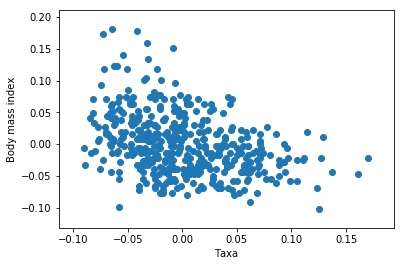

In [11]:
plt.scatter(tabela.bmi, tabela.s3)
plt.xlabel('Taxa')
plt.ylabel('Body mass index')
plt.show()

In [15]:
#Separa em dois conjuntos, um para treinamento e outro para validação (20 últimos)
X_t = X[:-20]
X_v = X[-20:]

Y_t = tabela["taxa"][:-20]
Y_v = tabela["taxa"][-20:]

regr = linear_model.LinearRegression()

#Treina o modelo
regr.fit(X_t, Y_t)

#Faz a predição
y_pred = regr.predict(X_v)

# coeficientes a
print('Coeficientes: ', regr.coef_)
#intercepto b
print('Coeficientes: ', regr.intercept_)

#prediz manualmente os valores com base nos coeficientes encontrados na regressao
y_teste = 814.25596331 * X_v["bmi"] - 348.151465 * X_v["s3"] + 152.80062545049168
y_teste.head(10)

#exibe o valor predito manualmente y_teste, que começa de 486
#exibe o valor real y_t
#exibe o valor predito pela regressão linear
print('Valor predito pela regressao: ',y_teste[422], y_t[0],y_pred[0])



Coeficientes:  [ 814.25596331 -348.151465  ]
Coeficientes:  152.80062545049168
Valor predito pela regressao 206.9578368384531 151.0 206.957836838339


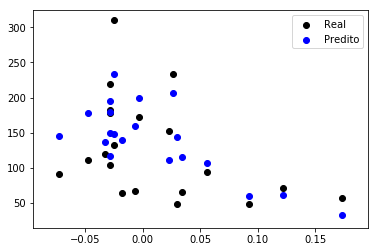

In [18]:
#plota todos os valores de validação
plt.scatter(X_v["s3"], Y_v,  color='black')
plt.scatter(X_v["s3"], y_pred, color='blue')
plt.legend(["Real", "Predito"])